In [7]:
%load_ext autoreload
%autoreload 2
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Module test

In [2]:
from velib.figure import Velib

In [4]:
from velib.figure import plot_day

In [3]:
velib = Velib()

<AxesSubplot:xlabel='datetime'>

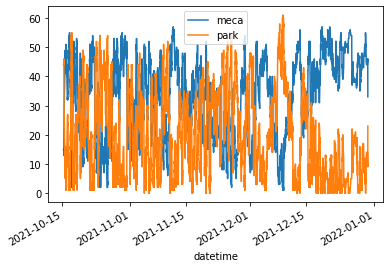

In [5]:
velib.plot_station(12001)

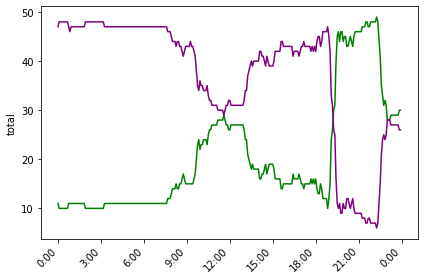

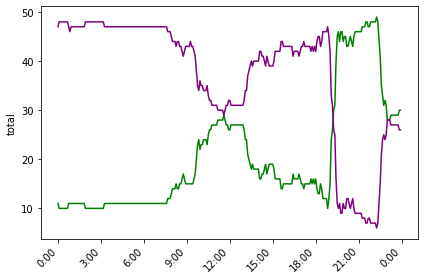

In [9]:
plot_day(velib, 12001, pd.Timestamp('2021-12-01'))

## Module copy

In [12]:
import os
import pandas as pd
import datetime as dt

ABS_PATH = os.getcwd()
if os.path.basename(ABS_PATH) != 'MaStationVelib':
    os.chdir(os.path.dirname(ABS_PATH))
    ABS_PATH = os.getcwd()
    if os.path.basename(ABS_PATH) != 'MaStationVelib':
        raise NameError("There's a problem with path")

DATA_PATH = os.path.join(ABS_PATH, "data", "data-5m.csv")

class Velib:
    def __init__(self, path=DATA_PATH, clean=True):
        self.df = pd.read_csv(path,
                     low_memory=False
                    )
        self.clean = False
        if clean:
            self.raw_df = self.df.copy()
            self.clean_df()

    def clean_df(self):
        self.df['datetime'] = pd.to_datetime(self.df.datetime, format='%Y-%m-%d %H-%M')
        for col in ['stationCode', 'meca', 'elec', 'park']:
            self.df[col] = pd.to_numeric(self.df[col], errors='coerce')
        self.df = self.df.dropna()
        for col in ['stationCode', 'meca', 'elec', 'park']:
            self.df[col] = self.df[col].astype(int)
        self.clean = True

    def get_df(self, raw=False):
        if raw:
            return self.raw_df
        if self.clean:
            print("dataframe has been cleaned")
            return self.df
        print("dataframe has NOT been cleaned")
        return self.df
    
    def get_number_rows(self):
        return len(self.df)
    
    def get_list_stations(self):
        return self.df.stationCode.unique()
    
    def get_dt_dict(self):
        df = self.df
        dt_dict = {
            "min": self.df.datetime.min(),
            "max": self.df.datetime.max(),
            "period": self.df.datetime.max() - self.df.datetime.min(),
        }
        return dt_dict
    
    def get_station(self, station_code, days=None, first_dt=None, last_dt=None):
        last_dt = last_dt if last_dt else self.df.datetime.max()
        if days:
            if first_dt:
                last_dt = first_dt + dt.timedelta(days=days)
            else:
                first_dt = last_dt - dt.timedelta(days=days)
        if not first_dt:
            first_dt = self.df.datetime.min()
        df = self.df[self.df.stationCode==station_code]
        df = df[(df.datetime >= first_dt) & (df.datetime < last_dt)]
        return df    

    def plot_station(self, station_code, days=None, first_dt=None, last_dt=None):
        df = self.get_station(station_code, days=days, first_dt=first_dt, last_dt=last_dt)
        return df.plot(x="datetime", y=["meca","park"])
    

In [123]:
def plot_day(velib, station_code, day):
    fig = plt.figure()
    ax = plt.subplot()
    df = velib.get_station(station_code, 1, day)
    df['total'] = df.meca + df.elec
    df['time'] = df.datetime.dt.hour + df.datetime.dt.minute/60

    sns.lineplot(ax=ax, data=df, x="time", y="total", color='g')
    sns.lineplot(ax=ax, data=df, x="time", y="park", color='purple')
    ax.set_xlabel('')
    
    ax.set_xticks([i for i in range(0,24,3)] + [24])
    ax.set_xticklabels([f"{i}:00" for i in range(0,24,3)] + ['0:00'])
    
    
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')
    fig.tight_layout()
    return fig

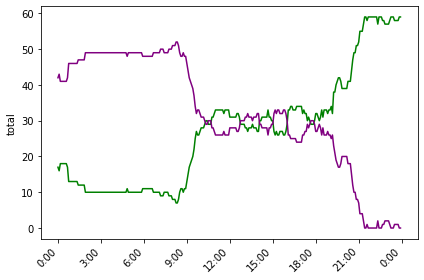

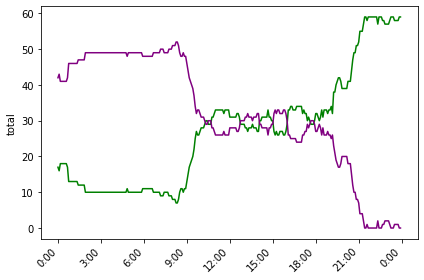

In [124]:
plot_day(velib, 12001, pd.Timestamp('2021-11-10'))

In [13]:
velib = Velib()

In [14]:
velib.get_dt_dict()

{'min': Timestamp('2021-10-15 06:11:00'),
 'max': Timestamp('2021-12-30 10:05:00'),
 'period': Timedelta('76 days 03:54:00')}

<AxesSubplot:xlabel='datetime'>

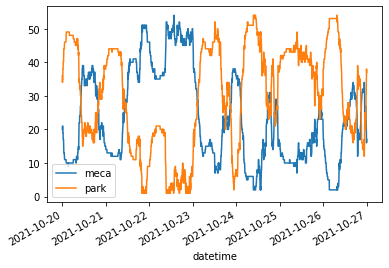

In [16]:
velib.plot_station(12001, 7, first_dt=pd.Timestamp('2021-10-20'))

## development

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
def plot_day(day):
    df = velib.get_station(12001, 1, first_dt=day)
    sns.lineplot(data = df, x="datetime", y="meca")

In [97]:
df.datetime.dt.time

1844865    00:00:00
1846297    00:05:00
1847729    00:10:00
1849161    00:15:00
1850593    00:20:00
             ...   
2250286    23:35:00
2251719    23:40:00
2253152    23:45:00
2254585    23:50:00
2256018    23:55:00
Name: datetime, Length: 288, dtype: object

In [99]:
df['time'] = df.datetime.dt.time

In [100]:
df.time.iloc[0]

datetime.time(0, 0)

In [106]:
def plot_day(ax, station_code, day):
    df = velib.get_station(station_code, 1, day)
    df['total'] = df.meca + df.elec
    df['time'] = df.datetime.dt.hour + df.datetime.dt.minute/60

    sns.lineplot(ax=ax, data=df, x="time", y="total", color='g')
    sns.lineplot(ax=ax, data=df, x="time", y="park", color='purple')

In [105]:
df.datetime.dt.hour + df.datetime.dt.minute/60

1844865     0.000000
1846297     0.083333
1847729     0.166667
1849161     0.250000
1850593     0.333333
             ...    
2250286    23.583333
2251719    23.666667
2253152    23.750000
2254585    23.833333
2256018    23.916667
Name: datetime, Length: 288, dtype: float64

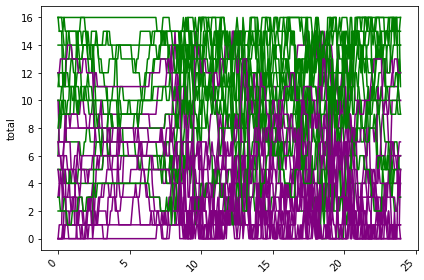

In [108]:
station_code = 12002
start_date = pd.Timestamp('2021-11-01')

fig = plt.figure()
ax = plt.subplot()
for day in [start_date+pd.Timedelta(days=1)*i for i in range(15)]:
    plot_day(ax, station_code, day)

ax.set_xlabel('')
ax.tick_params(axis='x', rotation=30)
for label in ax.get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')
fig.tight_layout()

In [ ]:
fig = plt.figure()
ax = plt.subplot()
sns.lineplot(ax=ax, data=df, x="datetime", y="total", color='g')
sns.lineplot(ax=ax, data=df, x="datetime", y="park", color='purple')
ax.set_xlabel('')
ax.tick_params(axis='x', rotation=30)
for label in ax.get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')
fig.tight_layout()

In [56]:
for 

df = velib.get_station(12001, 1, first_dt=day)

[None, None, None, None, None, None, None, None, None]

In [57]:
[label.get_ha() for label in ax.get_xticklabels()]

['left', 'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left']

In [43]:
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')

<ipython-input-43-42178cb04684>:1: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


[Text(18920.0, 0, '10-20 00'),
 Text(18920.125, 0, '10-20 03'),
 Text(18920.25, 0, '10-20 06'),
 Text(18920.375, 0, '10-20 09'),
 Text(18920.5, 0, '10-20 12'),
 Text(18920.625, 0, '10-20 15'),
 Text(18920.75, 0, '10-20 18'),
 Text(18920.875, 0, '10-20 21'),
 Text(18921.0, 0, '10-21 00')]

In [18]:
get_dt_dict(self)

{'min': Timestamp('2021-10-15 06:11:00'),
 'max': Timestamp('2021-12-30 10:05:00'),
 'period': Timedelta('76 days 03:54:00')}

In [25]:
def get_station(self, station_code, days=None, first_dt=None, last_dt=self.df.datetime.max()):
    if days:
        if first_dt:
            last_dt = begin + dt.timedelta(days=days)
        else:
            first_dt = last_dt - dt.timedelta(days=days)
    if not first_dt:
        first_dt = self.df.datetime.min()
    df = self.df[self.df.stationCode==station_code]
    df = df[df.datetime > first_dt]
    return df    

def plot_station(self, station_code, days=None, first_dt=None, last_dt=self.df.datetime.max()):
    df = self.get_station(station_code, days=days, first_dt=first_dt, last_dt=last_dt)
    return df.plot(x="datetime", y=["meca","park"])

In [30]:
plot_station(self, 12001, 15)

TypeError: get_station() got an unexpected keyword argument 'days'

In [82]:
velib.clean_df()

<ipython-input-78-84d1a3d43c1c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[col] = self.df[col].astype(int)


In [83]:
df = velib.get_df()

dataframe has been cleaned


In [84]:
velib.get_number_rows()

31300357

In [86]:
velib.get_station(8037)

,datetime,stationCode,meca,elec,park
876,2021-10-15 06:11:00,8037,1,1,33
2308,2021-10-15 06:15:00,8037,1,1,33
3740,2021-10-15 06:20:00,8037,1,1,33
5172,2021-10-15 06:25:00,8037,1,1,33
6604,2021-10-15 06:30:00,8037,1,1,33
...,...,...,...,...,...
31420574,2021-12-30 09:45:00,8037,1,1,33
31422020,2021-12-30 09:50:00,8037,1,2,32
31423466,2021-12-30 09:55:00,8037,1,2,32
31424912,2021-12-30 10:00:00,8037,1,2,32


<AxesSubplot:xlabel='datetime'>

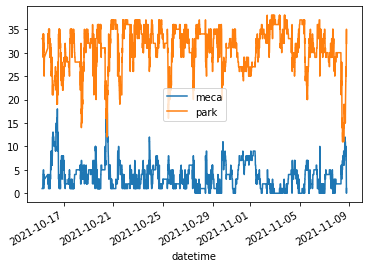

In [88]:
velib.plot_station(12001)

In [65]:
self = velib

In [74]:
def get_station(self, station_code):
    df = self.df[self.df.stationCode==station_code]
    return df

In [76]:
def plot_station(self, station_code):
    df = get_station(self, station_code)
    return df_8037.plot(x="datetime", y=["meca","park"] )

In [75]:
get_station(self, 8037)

,datetime,meca,elec,park
876,2021-10-15 06:11:00,1,1,33
2308,2021-10-15 06:15:00,1,1,33
3740,2021-10-15 06:20:00,1,1,33
5172,2021-10-15 06:25:00,1,1,33
6604,2021-10-15 06:30:00,1,1,33
...,...,...,...,...
31420574,2021-12-30 09:45:00,1,1,33
31422020,2021-12-30 09:50:00,1,2,32
31423466,2021-12-30 09:55:00,1,2,32
31424912,2021-12-30 10:00:00,1,2,32


<AxesSubplot:xlabel='datetime'>

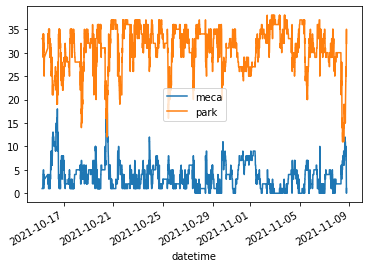

In [77]:
plot_station(self, 8037)

In [21]:
df_8037.to_dict()

{'datetime': {876: Timestamp('2021-10-15 06:11:00'),
  2308: Timestamp('2021-10-15 06:15:00'),
  3740: Timestamp('2021-10-15 06:20:00'),
  5172: Timestamp('2021-10-15 06:25:00'),
  6604: Timestamp('2021-10-15 06:30:00'),
  8036: Timestamp('2021-10-15 06:35:00'),
  9468: Timestamp('2021-10-15 06:40:00'),
  10900: Timestamp('2021-10-15 06:45:00'),
  12332: Timestamp('2021-10-15 06:50:00'),
  13764: Timestamp('2021-10-15 06:55:00'),
  15196: Timestamp('2021-10-15 07:00:00'),
  16628: Timestamp('2021-10-15 07:05:00'),
  18060: Timestamp('2021-10-15 07:10:00'),
  19492: Timestamp('2021-10-15 07:15:00'),
  20924: Timestamp('2021-10-15 07:20:00'),
  22356: Timestamp('2021-10-15 07:25:00'),
  23788: Timestamp('2021-10-15 07:30:00'),
  25220: Timestamp('2021-10-15 07:35:00'),
  26652: Timestamp('2021-10-15 07:40:00'),
  28084: Timestamp('2021-10-15 07:45:00'),
  29516: Timestamp('2021-10-15 07:50:00'),
  30948: Timestamp('2021-10-15 07:55:00'),
  32380: Timestamp('2021-10-15 08:00:00'),
  33812

<AxesSubplot:xlabel='datetime'>

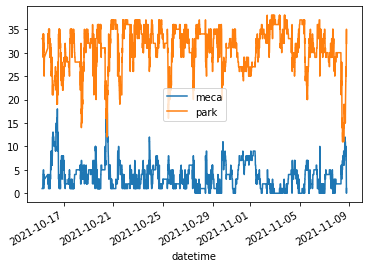

In [28]:
df_8037.plot(x="datetime", y=["meca","park"] )

In [29]:
import matplotlib.pyplot as plt

In [30]:
import seaborn as sns

<AxesSubplot:xlabel='datetime', ylabel='meca'>

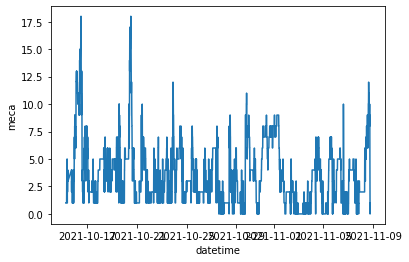

In [34]:
sns.lineplot(data=df_8037, x="datetime", y="meca" )